In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pickle as pkl
import copy
import matplotlib.patches as mpatches
from utils import OPT_PATH as opt_path
# refer to https://matplotlib.org/stable/api/markers_api.html
markers = ["o", "v", "s", "*", "D"]
# refer to https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
linestyles = 'solid'
# refer to https://github.com/bvalgard/Boxplots/blob/master/Boxplots.ipynb

In [2]:
glob.glob(os.path.join(opt_path, '*SI_DTMI*'))

[]

### Benign v.s. I-FGSM, DTMI, DTMI-Ours

In [2]:
ifgsm_path = glob.glob(os.path.join(opt_path, '*-DTMI-*motivation_IFGSM/cosine_similarity.json'))
with open(ifgsm_path[0], 'rb') as ipt:
    ifgsm_info = pkl.load(ipt)
    
dtmi_path = glob.glob(os.path.join(opt_path, '*-DTMI-*motivation/cosine_similarity.json'))
with open(dtmi_path[0], 'rb') as ipt:
    dtmi_info = pkl.load(ipt)
    
our_dtmi_path = glob.glob(os.path.join(opt_path, '*-DTMI_Local_FeatureSimilarityLoss-*motivation/cosine_similarity.json'))
with open(our_dtmi_path[0], 'rb') as ipt:
    our_dtmi_info = pkl.load(ipt)

In [3]:
names = ['Benign'] * len(ifgsm_info[770][2][0]) + ['I-FGSM'] * len(ifgsm_info[770][2][1]) + \
    ['DTMI'] * len(dtmi_info[770][2][1]) + ['DTMI-LI'] * len(our_dtmi_info[770][2][1])
info = pd.DataFrame()
info['Calculate Cosine Similarity Between'] = names
info['Cosine Similarity Value'] = ifgsm_info[770][2][0] + ifgsm_info[770][2][1] + dtmi_info[770][2][1] + our_dtmi_info[770][2][1]

In [6]:
info.loc[info['Calculate Cosine Similarity Between'] == 'DTMI-LI', 'Calculate Cosine Similarity Between'] = 'DTMI-SU'

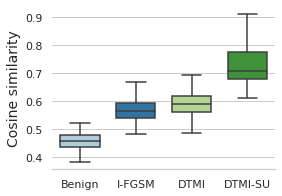

In [8]:
sns.set(style='whitegrid')
sns.set_palette(sns.color_palette("Paired"))
fig, ax = plt.subplots(figsize=(4,3))
# g = sns.boxplot(data=df, width=0.7)#notch=True, ) # df[['p1_satisfaction','p2_satisfaction','p3_satisfaction']]
g = sns.boxplot(x="Calculate Cosine Similarity Between", y="Cosine Similarity Value", data=info, \
                width=0.7, showfliers = False) # , 

plt.xlabel("", fontsize=14)
# with a descriptive title a ylabel might not be necessary
plt.ylabel("Cosine similarity", fontsize=14)

# plt.xticks([0, 1, 2, 3],['Benign',''])
# set y-axis values (I only want whole numbers)
# plt.yticks(np.arange(0,14))

# remove all borders except bottom
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)
plt.savefig('./figures/features_cs.pdf', format='pdf', bbox_inches = 'tight')

### Rebuttal SI and Admix

In [3]:
ifgsm_path = glob.glob(os.path.join('/share_io02_ssd/zhipeng/targeted_attack_loss/', 'Loss-resnet50-NIPSDataset-Admix_DTMI-Target_CE-baseline/cosine_similarity.json'))
with open(ifgsm_path[0], 'rb') as ipt:
    ifgsm_info = pkl.load(ipt)
    
dtmi_path = glob.glob(os.path.join('/share_io02_ssd/zhipeng/targeted_attack_loss/', 'Loss-resnet50-NIPSDataset-SI_DTMI-Target_CE-baseline/cosine_similarity.json'))
with open(dtmi_path[0], 'rb') as ipt:
    dtmi_info = pkl.load(ipt)

In [8]:
names = ['Admix'] * len(ifgsm_info[770][2][0]) + ['SI'] * len(ifgsm_info[770][2][1])
info = pd.DataFrame()
info['Calculate Cosine Similarity Between'] = names
info['Cosine Similarity Value'] = ifgsm_info[770][2][1] + dtmi_info[770][2][1]

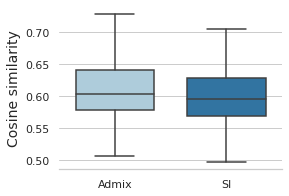

In [9]:
sns.set(style='whitegrid')
sns.set_palette(sns.color_palette("Paired"))
fig, ax = plt.subplots(figsize=(4,3))
# g = sns.boxplot(data=df, width=0.7)#notch=True, ) # df[['p1_satisfaction','p2_satisfaction','p3_satisfaction']]
g = sns.boxplot(x="Calculate Cosine Similarity Between", y="Cosine Similarity Value", data=info, \
                width=0.7, showfliers = False) # , 

plt.xlabel("", fontsize=14)
# with a descriptive title a ylabel might not be necessary
plt.ylabel("Cosine similarity", fontsize=14)

# plt.xticks([0, 1, 2, 3],['Benign',''])
# set y-axis values (I only want whole numbers)
# plt.yticks(np.arange(0,14))

# remove all borders except bottom
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)
# plt.savefig('./figures/features_cs.pdf', format='pdf', bbox_inches = 'tight')